<a href="https://colab.research.google.com/github/Lizethmurcia29/TIC_lizeth/blob/main/Comentarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis de Sentimientos en dataset de comentarios

In [2]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 1.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=fa32ead811cd7436412657559601b2eb8c799d2009687842cd8f6992a6f67fb3
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
 

In [3]:
!pip install textblob

In [26]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:
#Funcion para traducir comentarios de ingles a español
def translateComment(strComment: str):
    translator = Translator()
    strEngComment = translator.translate(strComment, src="es", dest="en") #Guarda el comentario en ingles
    return strEngComment.text

In [14]:
# Función para obtener la polaridad del comentario
def getPolarity(strComment: str):#Toma la polaridad del comentario
    strComment = translateComment(strComment)  # Traducimos el comentario a inglés
    analysis = TextBlob(strComment)  # Analizamos el sentimiento usando TextBlob
    return analysis.sentiment.polarity  # Retornamos la polaridad del análisis, propiedad de la libreria
df = pd.read_csv('/content/Comentarios.csv')

In [16]:
# Aplicamos la función getPolarity a la columna de comentarios y creamos una nueva columna 'polaridad'
df['polaridad'] = df['Comentario'].apply(getPolarity)

df.to_csv("Comentarios.csv", index=False)

In [9]:
print(df)

                                           Comentario  polaridad
0   La comida fue excelente y el servicio fue exce...   0.555556
1   El ambiente era agradable y la comida estaba d...   0.261458
2   La comida estaba bien, pero el servicio fue le...   0.200000
3   No me gustó la comida, estaba fría y el sabor ...  -0.475000
4   El peor restaurante en el que he estado. No lo...  -1.000000
..                                                ...        ...
66  Siempre disfruto venir aquí. La comida es deli...   0.629167
67  Buen lugar para cenar, aunque el servicio pued...   0.070833
68  La comida está bien, pero el ambiente no es mu...   0.208974
69  No me gustó la comida y el servicio fue muy de...  -0.520000
70  Terrible experiencia. No recomendaría este lug...  -1.000000

[71 rows x 2 columns]


In [11]:
print(df.head())

                                          Comentario  polaridad
0  La comida fue excelente y el servicio fue exce...   0.555556
1  El ambiente era agradable y la comida estaba d...   0.261458
2  La comida estaba bien, pero el servicio fue le...   0.200000
3  No me gustó la comida, estaba fría y el sabor ...  -0.475000
4  El peor restaurante en el que he estado. No lo...  -1.000000


In [17]:
print(df.columns)
df['polaridad'] = df['Comentario'].apply(getPolarity)

Index(['Comentario', 'polaridad'], dtype='object')


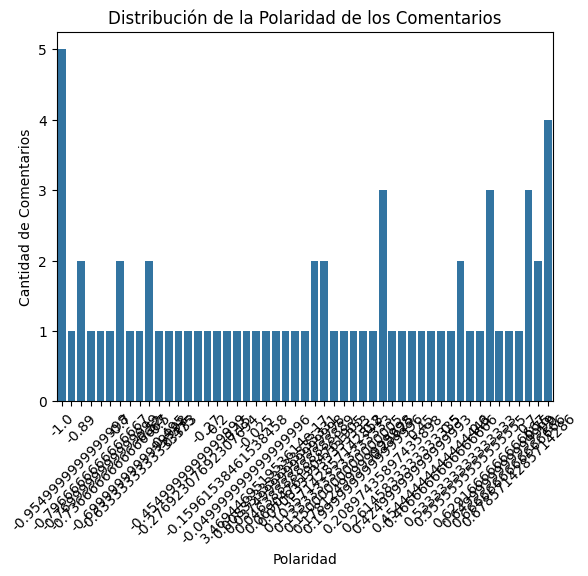

In [18]:
sns.countplot(x='polaridad', data=df)

plt.title('Distribución de la Polaridad de los Comentarios')
plt.xlabel('Polaridad')
plt.ylabel('Cantidad de Comentarios')
plt.xticks(rotation=45)
plt.show()

Los comentarios tienen como categorias de valores negativo quienes estan representados como aspectos malos del lugar, valores positivos que se encuentaran llegando a 1 y con cero es neutral.

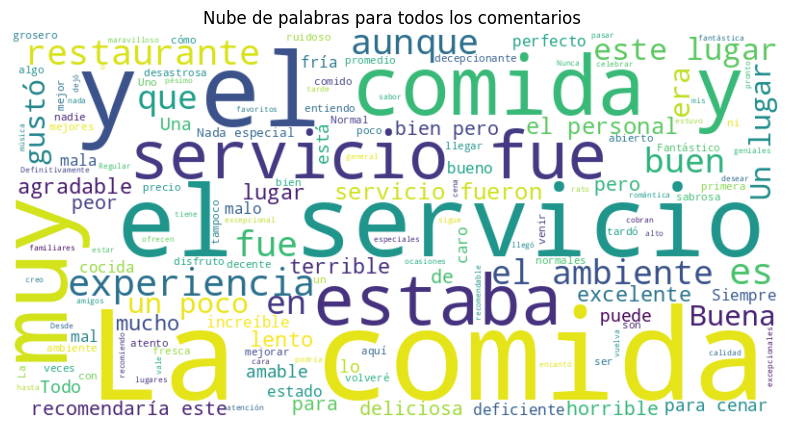

In [28]:
# Concatenamos todos los comentarios en un solo string
all_comments = " ".join(comment for comment in df['Comentario'])

# Generamos la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitamos los ejes
plt.title("Nube de palabras para todos los comentarios ")
plt.show()

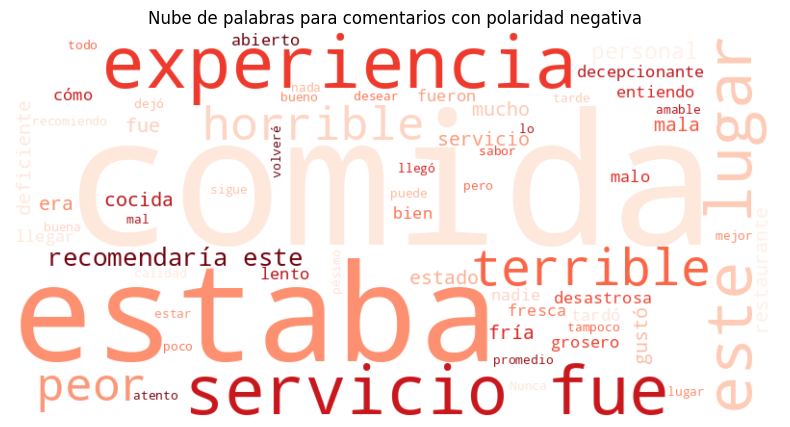

In [33]:
from wordcloud import WordCloud, STOPWORDS
negative_comments = df[df['polaridad'] < 0]['Comentario']

# Concatenate all negative comments into a single string
all_negative_comments = " ".join(comment for comment in negative_comments)

# Create a custom set of stopwords
stopwords = set(STOPWORDS).union({"el", "la", "los", "las", "de", "y", "a", "que", "en", "por", "con", "es", "un", "una", "para", "muy"})

# Generate the word cloud excluding stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='Reds').generate(all_negative_comments)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title("Nube de palabras para comentarios con polaridad negativa")
plt.show()

<Figure size 1000x500 with 0 Axes>

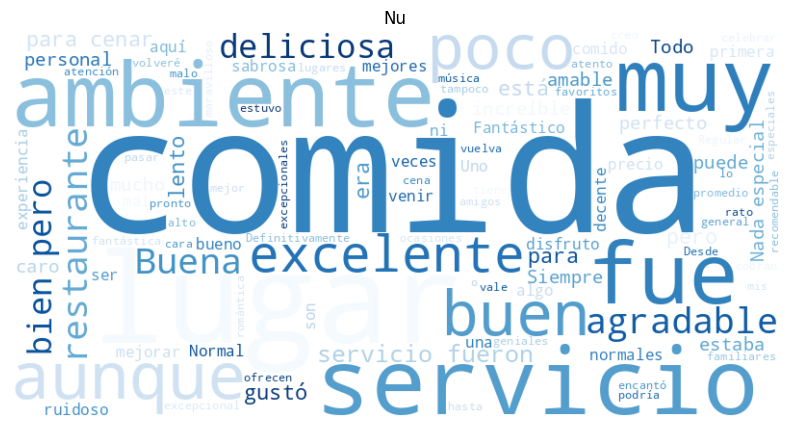

In [37]:
#Comentarios Positivos

positive_comments = df[df['polaridad'] > 0]['Comentario']

# Concatenate all positive comments into a single string
all_positive_comments = " ".join(comment for comment in positive_comments)

stopwords = set(STOPWORDS).union({"el", "la", "los", "las", "de", "y", "a", "que", "en", "por", "con","un","es"})
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='Blues').generate(all_positive_comments)

plt.figure(figsize=(10, 5))

positive_comments = df[df['polaridad'] > 0]['Comentario']

# Relaciona todos los comentarios positivos en el single string
all_positive_comments = " ".join(comment for comment in positive_comments)


stopwords = set(STOPWORDS).union({"el", "la", "los", "las", "de", "y", "a", "que", "en", "por", "con","un","es"})

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='Blues').generate(all_positive_comments)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nu")
plt.show()